## Activity: Titanic Survival Predictions Interpretation using Shap Values

1. Load the Titanic dataset into your Python environment. (use train then test)

2. Perform necessary data preprocessing steps, including handling missing values and encoding categorical variables.

3. Choose a machine learning model and train it on the preprocessed Titanic dataset.

4. Calculate Shap values for the trained model using the SHAP library. 

5. Select a specific instance (index) from the dataset for interpretation and explain how Shap values help in interpreting the prediction for that instance.

6. Visualize the Shap values for the selected instance and interpret the plot, highlighting feature contributions. 

7. Summarize the significance of Shap values in interpreting machine learning models' predictions, particularly in the context of the Titanic survival predictions.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import shap

# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [8]:
combined_data = pd.concat([train_data, test_data], axis=0)

# Handle missing values

combined_data['Age'].fillna(combined_data['Age'].median(), inplace=True)
combined_data['Embarked'].fillna(combined_data['Embarked'].mode()[0], inplace=True)
combined_data['Fare'].fillna(combined_data['Fare'].median(), inplace=True)
combined_data = pd.get_dummies(combined_data, columns=['Sex', 'Embarked'], drop_first=True)
combined_data.drop('Name', axis=1, inplace=True)
combined_data.drop('Ticket', axis=1, inplace=True)
combined_data.drop('Cabin', axis=1, inplace=True)

# Split the combined data back into train and test sets
train_data = combined_data.iloc[:len(train_data), :]
test_data = combined_data.iloc[len(train_data):, :]

  0%|          | 0/179 [00:00<?, ?it/s]

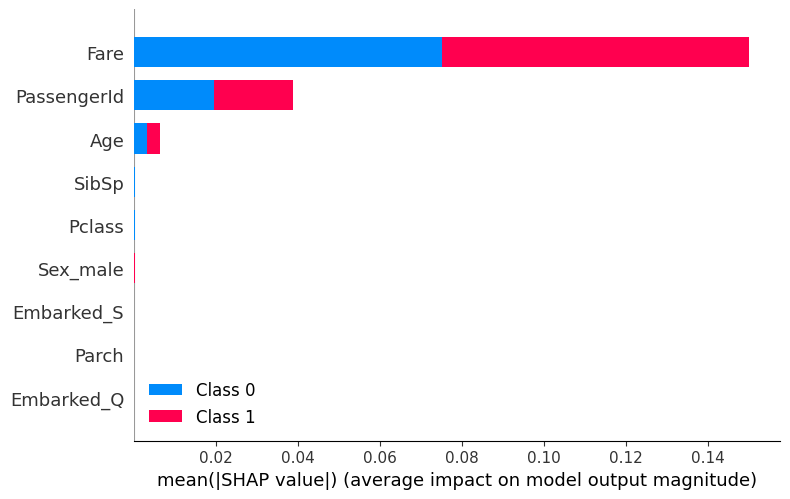

In [12]:
# Split train_data into features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(probability=True)  # Set probability=True for SHAP values
model.fit(X_train, y_train)

# Use KernelExplainer for SHAP values with summarized background
background_data_summary = shap.kmeans(X_train, 10)  # You can adjust the number of clusters (10 in this example)
explainer = shap.KernelExplainer(model.predict_proba, background_data_summary)
shap_values = explainer.shap_values(X_test)

# Select a specific instance for interpretation (e.g., the first instance)
instance_index = 0

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Force plot for the selected instance
shap.force_plot(explainer.expected_value[1], shap_values[1][instance_index, :], X_test.iloc[instance_index, :])